2.4.	Xác định góc của đối tượng

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-49.800000000000004..255.0].


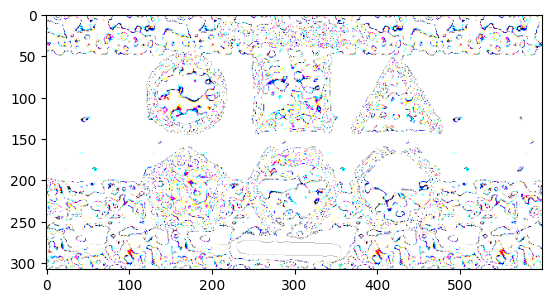

In [1]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, 0)
    y = nd.sobel(indata, 1)
    x1 = x ** 2
    y1 = y ** 2
    xy = abs(x * y)
    x1 = nd.gaussian_filter(x1, 3)
    y1 = nd.gaussian_filter(y1, 3)
    xy = nd.gaussian_filter(xy, 3)

    detC = x1 * y1 - 2 * xy
    trC = x1 + y1
    R = detC - alpha * trC ** 2
    return R

data = Image.open('geometric.png')
bmg = Harris(data)
plt.imshow(bmg)
plt.show()
